# Gradient Boosting

## 1. Load and Split the Dataset

In [46]:
import pandas as pd
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## 2. Add more features and split again

In [48]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [49]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [50]:
# data with new features
X_new = np.empty((X.shape[0],12))
X_new[:,0] = X[:,0]
X_new[:,1] = X[:,1]
X_new[:,2] = X[:,2]
X_new[:,3] = X[:,3]
X_new[:,4] = X[:,0] * X[:,1]
X_new[:,5] = X[:,2] * X[:,3]
X_new[:,6] = X[:,0] / X[:,1]
X_new[:,7] = X[:,2] / X[:,3]
X_new[:,8] = X[:,0] - X[:,1]
X_new[:,9] = X[:,2] - X[:,3]
X_new[:,10] = X[:,0] + X[:,2]
X_new[:,11] = X[:,1] + X[:,3]

In [51]:
# Normalize the data and perform the test/train split again
X_new = (X_new - np.mean(X_new, axis=0))/np.std(X_new, axis=0)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.25, random_state=42)

## 3. Model Execution

In [52]:
# Perfom xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

model = XGBClassifier(objective="multi:softprob")
model.fit(X_train, y_train)
model.score(X_test,y_test)

1.0

In [53]:
# y_pred = model.predict(X_test)
# predictions = [round(value) for value in y_pred]


# # evaluate predictions
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))


## 4. Feature Importance

In [54]:
# Features
print(model.get_booster().get_score())

{'f2': 47, 'f5': 79, 'f1': 22, 'f6': 40, 'f3': 17, 'f10': 27, 'f9': 7, 'f7': 38, 'f8': 12, 'f0': 5, 'f4': 7}


<BarContainer object of 11 artists>

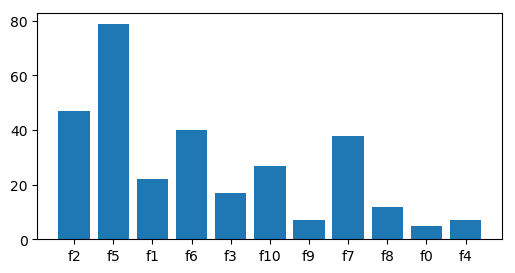

In [55]:
import operator
import matplotlib.pyplot as plt
%matplotlib inline
dict_model_features = model.get_booster().get_score()

keys = dict_model_features.keys()
values = dict_model_features.values()
fig = plt.figure(figsize=(6,3),dpi=100)
plt.bar(keys, values)

As we cans see form the graph the most important feature out of the ones we have got is f5 that is **X_new[:,5] = X[:,2] * X[:,3]**

## 5. Feature Selection

Feature Selection is one of the vital steps in the overall process of creating and running a model. Having irrelevant features makes your model learn based off insignificant data, and spent much time in vain. Feature Selecrtion can assist in reducing the trainng time, increasing the accuracy of the model, and making a simplier models to interpret. Also, Feature Selection can reduce overfitting chances, considering less features.